# Ensure compatibility with OpenCV
A major aim of this crate is to provide a fully compatible yet lighweight alternative to OpenCV. With this Jupyter notebook, you are able to generate custom tests for specific images. The python environment requires OpenCV, numpy, and matplotlib installed by Pip or conda.

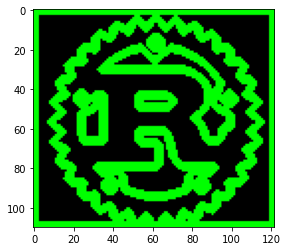

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# The path to your image
PATH = "example_image.png"

image = cv.imread(PATH, cv.IMREAD_GRAYSCALE)
_, image = cv.threshold(image, 127, 255, 0)
contours, _ = cv.findContours(image, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv.contourArea, reverse=True)

output = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
cv.drawContours(output, contours, -1, (0, 255, 0), 3)
plt.imshow(output);

## Select one of the contours

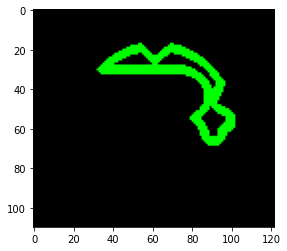

In [3]:
# The index of your contour
CONTOUR_INDEX = 2

contour = contours[CONTOUR_INDEX]
output = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
cv.drawContours(output, [contour], -1, (0, 255, 0), 3)
plt.imshow(output);

## Generate appropiate code for tests

In [5]:
print("let points = [{}];".format(", ".join(f"({point[0][0]}, {point[0][1]})" for point in contour)))
print("[...]")
for name, value in cv.moments(contour).items():
    if len(name) != 3:
        continue
    print(f"assert_abs_diff_eq!(moments.get::<{name[1]}, {name[2]}>(), {value});")

print("")

for name, value in cv.moments(contour).items():
    if len(name) != 4 or not name.startswith("mu"):
        continue
    print(f"assert_abs_diff_eq!(central_moments.get::<{name[2]}, {name[3]}>(), {value});")

print("")

for name, value in cv.moments(contour).items():
    if len(name) != 4 or not name.startswith("nu"):
        continue
    print(f"assert_abs_diff_eq!(normalized_central_moments.get::<{name[2]}, {name[3]}>(), {value}, epsilon = 10e-7);")

let points = [(53, 19), (52, 20), (49, 20), (48, 21), (47, 21), (46, 22), (45, 22), (44, 23), (43, 23), (42, 24), (41, 24), (39, 26), (38, 26), (34, 30), (76, 30), (77, 31), (79, 31), (80, 32), (81, 32), (83, 34), (84, 34), (86, 36), (86, 37), (87, 38), (87, 39), (88, 40), (88, 47), (86, 49), (86, 50), (83, 53), (82, 53), (81, 54), (81, 55), (82, 55), (84, 57), (84, 58), (85, 59), (85, 60), (86, 61), (86, 63), (87, 64), (87, 65), (88, 66), (93, 66), (94, 65), (94, 64), (95, 63), (95, 60), (96, 59), (99, 59), (99, 53), (98, 52), (97, 52), (96, 51), (95, 51), (94, 50), (93, 50), (90, 47), (90, 46), (91, 45), (91, 44), (92, 43), (92, 42), (93, 41), (93, 39), (94, 38), (94, 36), (91, 33), (91, 32), (85, 26), (84, 26), (82, 24), (81, 24), (80, 23), (79, 23), (78, 22), (77, 22), (76, 21), (75, 21), (74, 20), (71, 20), (70, 19), (69, 19), (67, 21), (66, 21), (62, 25), (60, 25), (54, 19)];
[...]
assert_abs_diff_eq!(moments.get::<0, 0>(), 703.0);
assert_abs_diff_eq!(moments.get::<1, 0>(), 52175